In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse             # Sparse matrices
from scipy.sparse.linalg import spsolve 

In [30]:

def construct_system_matrix(M, r):
    Mi = M-1       # Number of inner points in each direction
    Mi2 = Mi**2    # Number of inner points in total
    M2 = M**2

    # Construct a sparse A-matrix
    B = sparse.diags([-r,1+4*r,-r],[-1,0,1],shape=(M, M), format="lil")
    A = sparse.kron(sparse.eye(M), B)
    C = sparse.diags([-r,-r],[-M,M],shape=(M2, M2), format="lil")
    A = (A+C).tocsr() # Konverter til csr-format (necessary for spsolve) 
    return A

def construct_rhs_matrix(M,r,h,beta):
    Mi = M-1       # Number of inner points in each direction
    Mi2 = Mi**2    # Number of inner points in total
    M2 = M**2

    # Construct a sparse A-matrix
    B = sparse.diags([r,1-4*r*h*beta,r],[-1,0,1],shape=(M, M), format="lil")
    A = sparse.kron(sparse.eye(M), B)
    C = sparse.diags([r,r],[-M,M],shape=(M2, M2), format="lil")
    A = (A+C).tocsr() # Konverter til csr-format (necessary for spsolve) 
    return A

def solve_2d_heat_eq(U0, M, N, beta):
    h = 1/M
    k = 1/N

    r = k/h**2

    A = construct_system_matrix(M, r)
    F = construct_rhs_matrix(M, r, h, beta)

    save_state = [U0]

    Ui = U0
    for i in range(N):
        next_U = spsolve(A, F@Ui)
        save_state.append(Ui)
        Ui = next_U
    
    return np.array(save_state)


def plot_surface(x,y,U):
    '''
    Plot surfaces 
    '''
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, U)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def plot_heatmap(x, y, U, cmap='viridis'):
    '''
    Plot a 2D heatmap of U on the grid defined by x and y.
    x, y should be 1D arrays; U a 2D array with shape (len(y), len(x)) or (len(x), len(y)) depending on orientation.
    '''
    plt.figure()
    # Create meshgrid for plotting if needed
    X, Y = np.meshgrid(x, y)
    # Use pcolormesh for a heatmap with a colorbar
    plt.pcolormesh(X, Y, U, shading='auto', cmap=cmap)
    plt.colorbar(label='u')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Heatmap')
    plt.show()

def sq_array_to_matrix(M, U):
    ret_arr = np.zeros((M,M))
    for i in range(0, M):
        ret_arr[i] = U[i*M:(i+1)*M]
    
    return ret_arr
    

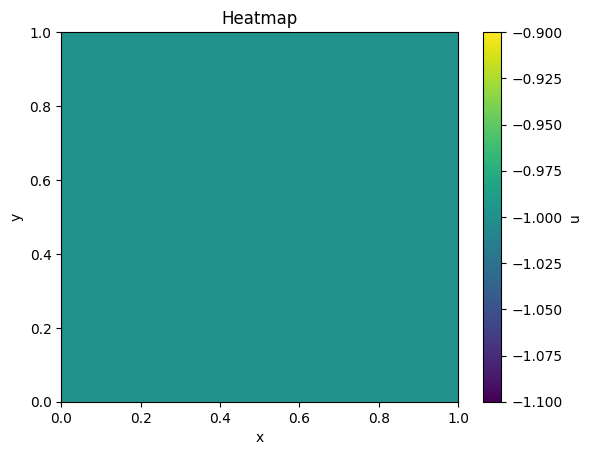

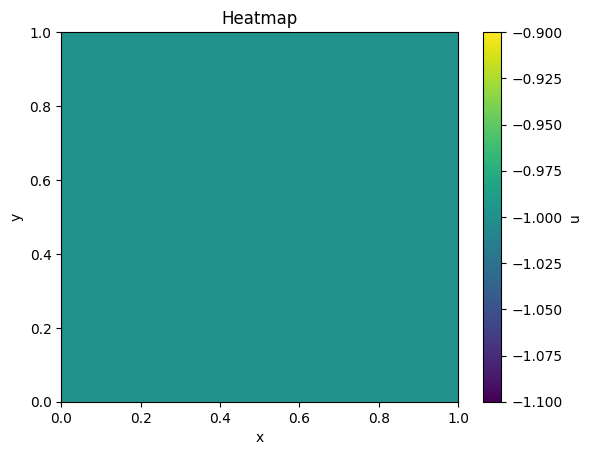

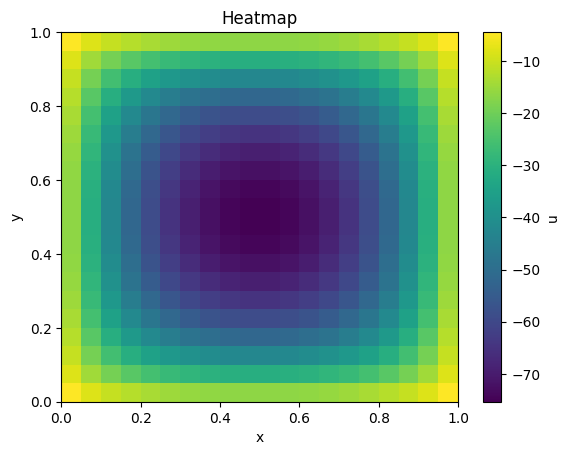

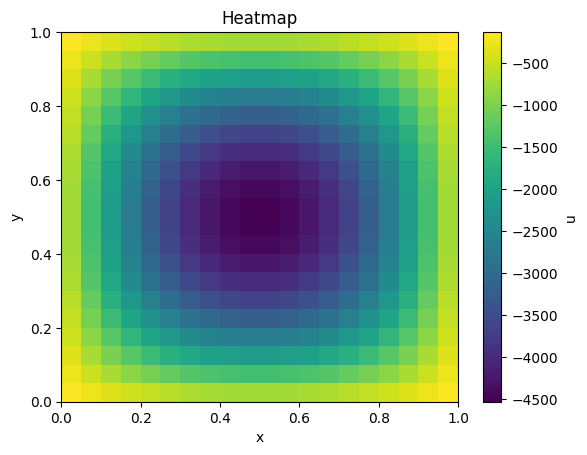

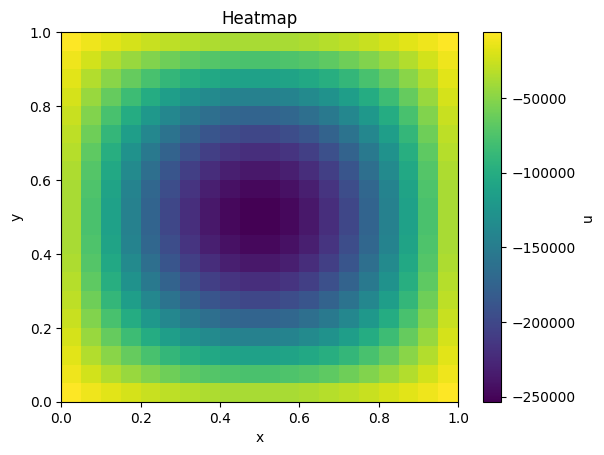

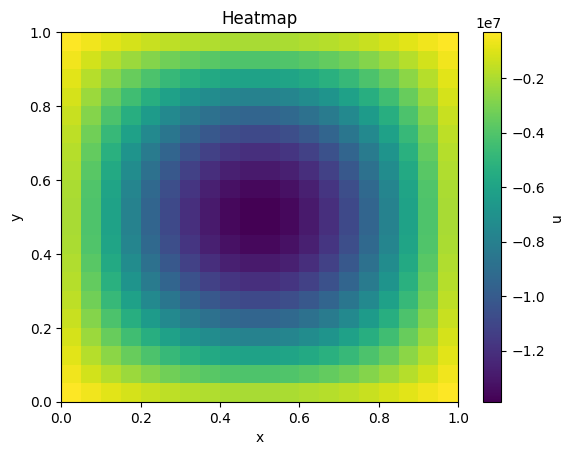

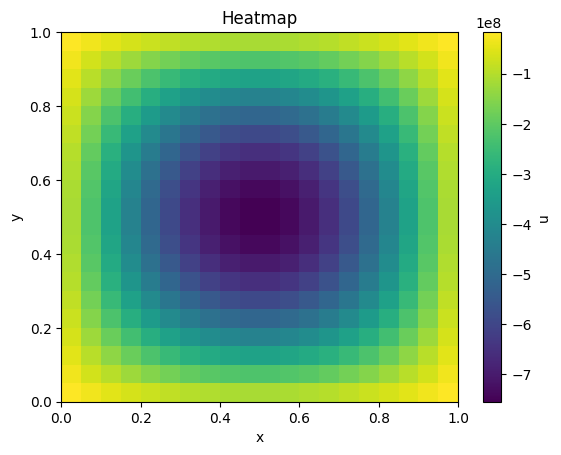

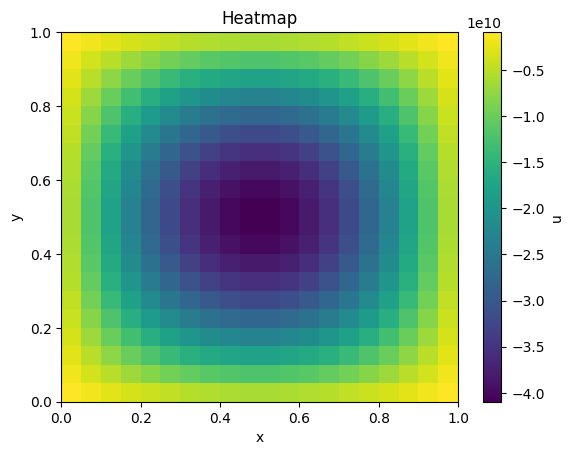

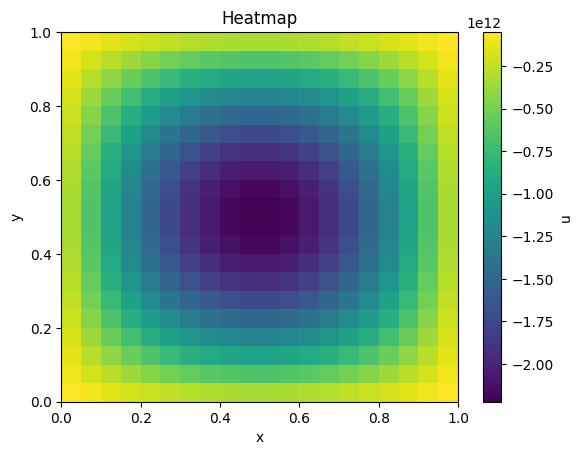

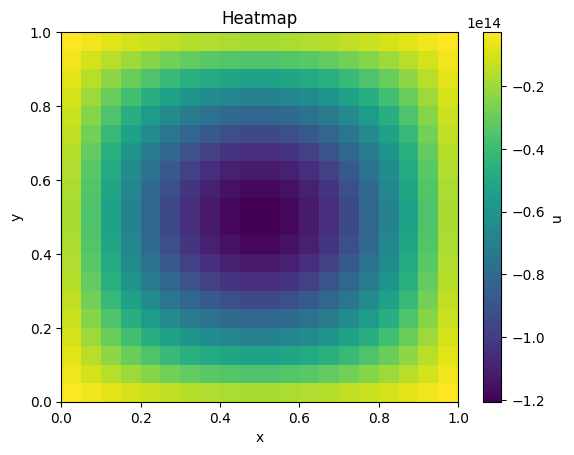

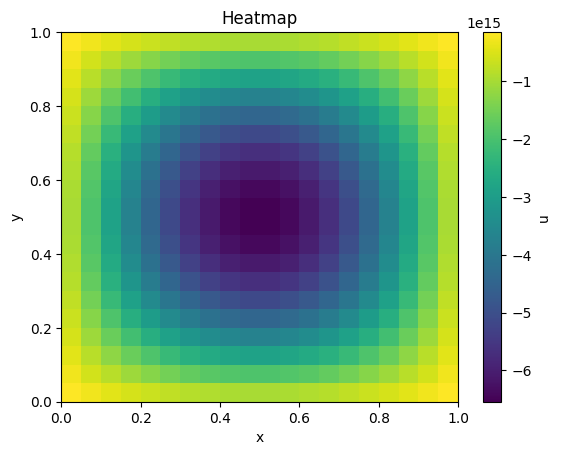

In [32]:
M = 20
M_2 = M**2
N = 10
beta = 1

U0 = -1*np.ones(M_2)

solutions = solve_2d_heat_eq(U0, M, N, beta)

# Use M points (internal grid) to match solution array shape (M, M)
x = np.linspace(0, 1, M+1)
y = np.linspace(0, 1, M+1)

X, Y = np.meshgrid(x, y)

for i in range(len(solutions)):
    sol_i = sq_array_to_matrix(M, solutions[i])
    plot_heatmap(x, y, sol_i)
